In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys, os
opj = os.path.join
CODE_DIR = os.path.abspath('../..')
sys.path.append(opj(CODE_DIR, 'EPypes'))
sys.path.append(opj(CODE_DIR, 'RPALib'))

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'

In [3]:
from epypes.compgraph import CompGraph, CompGraphRunner
from epypes.pipeline import Pipeline
from rpa.io import open_image
from rpa.features import CGFeatures, create_concrete_feature_cg, create_feature_matching_cg, METHOD_PARAMS

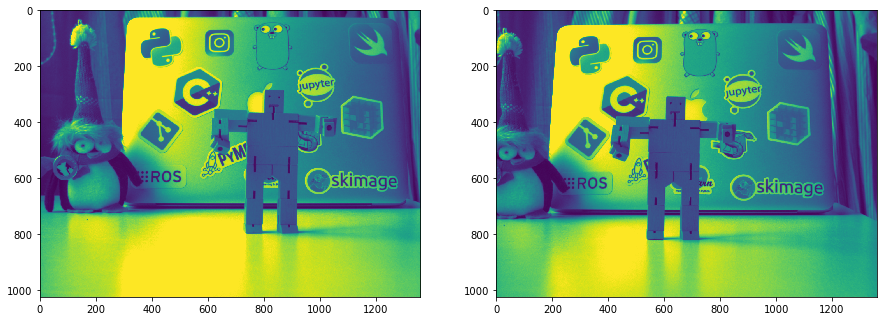

In [4]:
im_gray_1 = open_image(opj(CODE_DIR, 'DATA/IMG/stereo/robotmac/left_im0.png'), color_transform=cv2.COLOR_BGR2GRAY)
im_gray_2 = open_image(opj(CODE_DIR, 'DATA/IMG/stereo/robotmac/right_im0.png'), color_transform=cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(im_gray_1)
plt.subplot(1, 2, 2)
plt.imshow(im_gray_2)

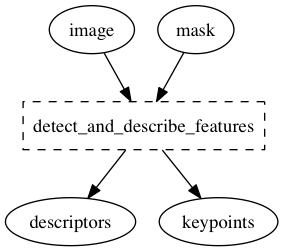

In [5]:
nxpd.draw(CGFeatures().to_networkx())

In [6]:
CHOSEN_METHOD = 'orb'

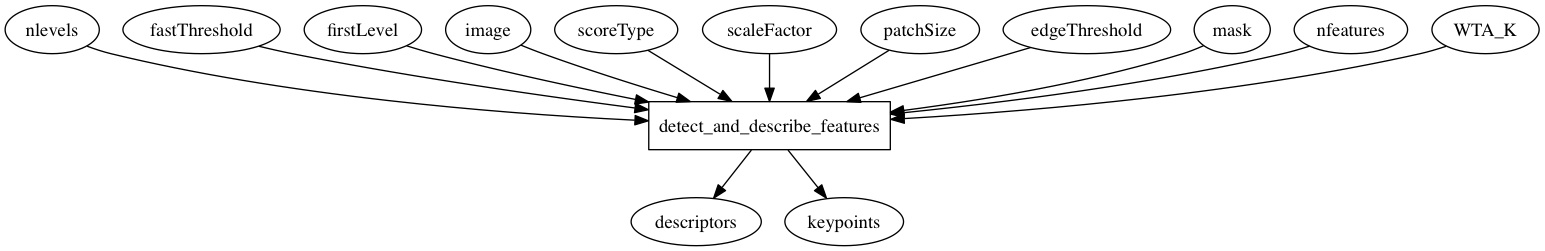

In [7]:
cg_surf = create_concrete_feature_cg(CHOSEN_METHOD)
nxpd.draw(cg_surf.to_networkx())

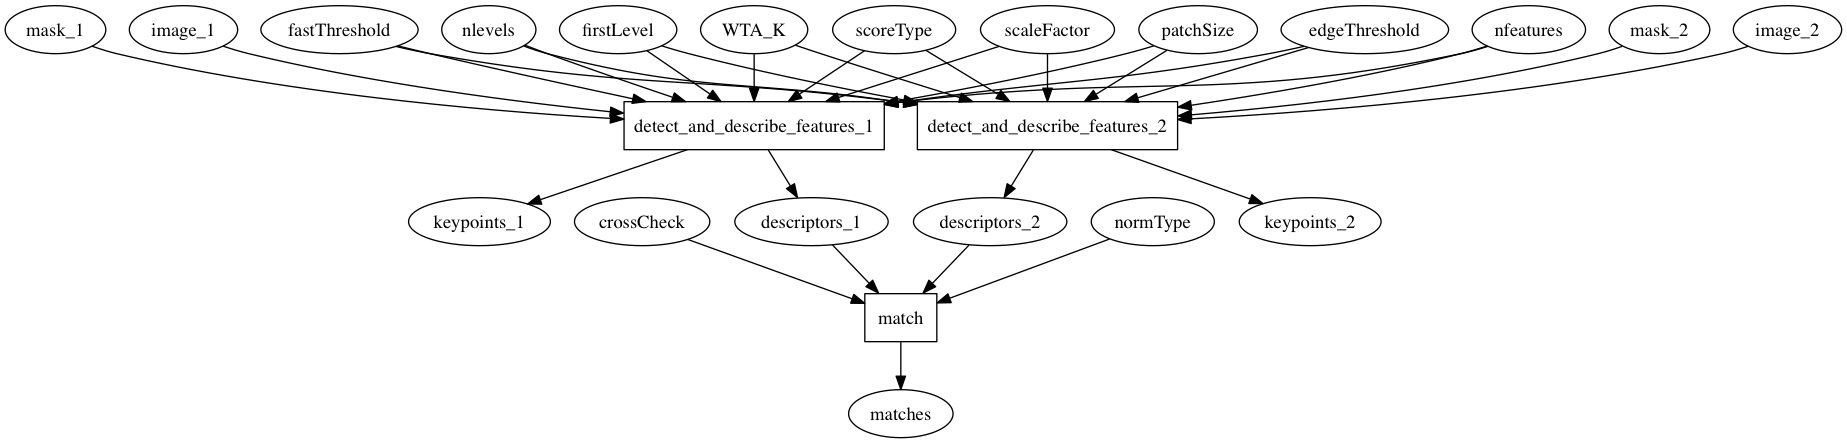

In [8]:
cg_match = create_feature_matching_cg(CHOSEN_METHOD)
nxpd.draw(cg_match.to_networkx())

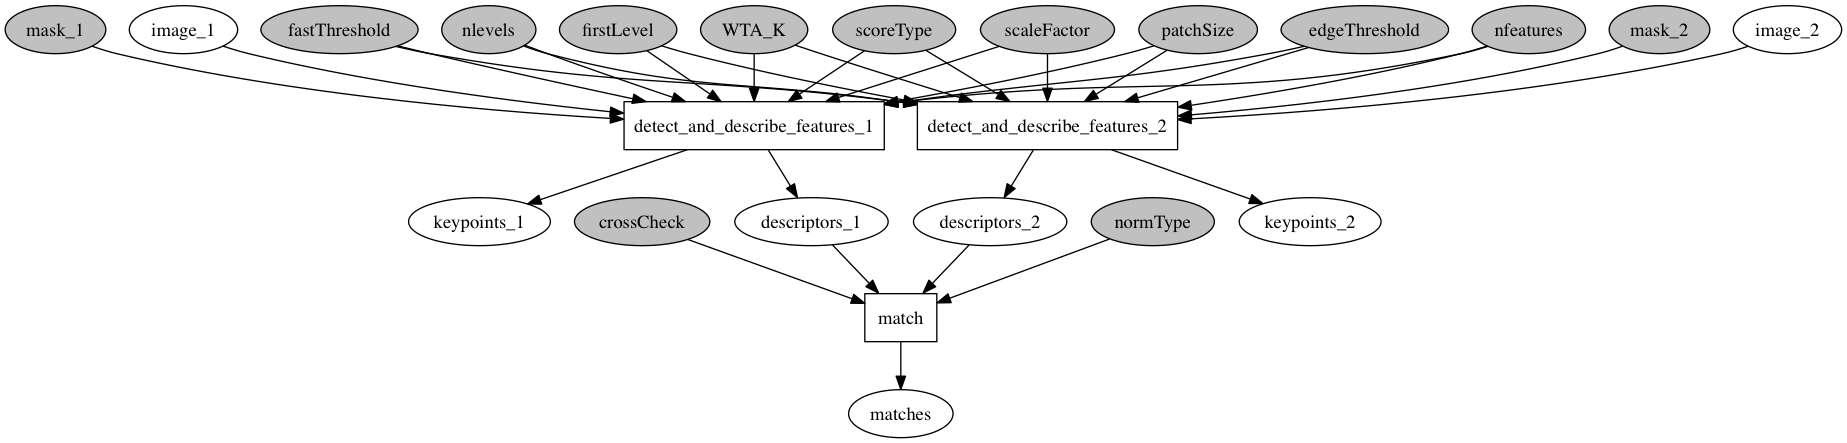

In [9]:
ft = {p: None for p in METHOD_PARAMS[CHOSEN_METHOD]}
ft['mask_1'] = None
ft['mask_2'] = None
ft['normType'] = cv2.NORM_HAMMING
ft['crossCheck'] = True

runner_match = CompGraphRunner(cg_match, frozen_tokens=ft)

nxpd.draw(runner_match.token_manager.to_networkx())

In [10]:
runner_match.run(image_1=im_gray_1, image_2=im_gray_2)

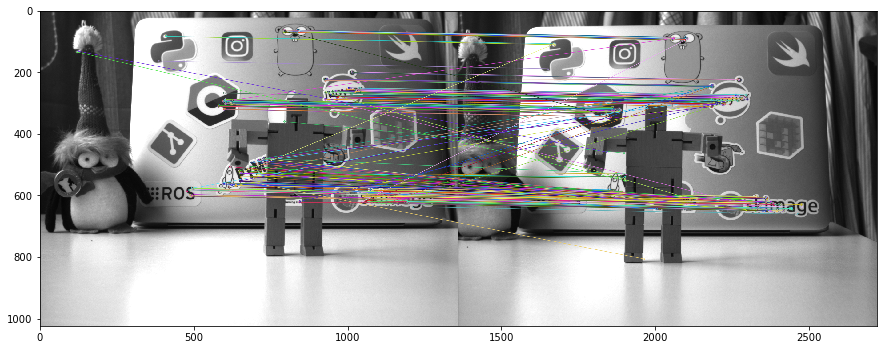

In [11]:
matches = sorted(runner_match['matches'], key=(lambda m : m.distance))
matches_im = cv2.drawMatches(im_gray_1, runner_match['keypoints_1'], im_gray_2, runner_match['keypoints_2'], matches, None, flags=2)

plt.figure(figsize=(15, 10))
plt.imshow(matches_im)

In [12]:
match_pipe = Pipeline('ORBMatcher', cg_match, frozen_tokens=ft)
match_pipe.run(image_1=im_gray_1, image_2=im_gray_2)

In [13]:
match_pipe.traverse_time()

('ORBMatcher',
 0.0766761302947998,
 (('detect_and_describe_features_1', 0.045361995697021484),
  ('detect_and_describe_features_2', 0.027177095413208008),
  ('match', 0.0039010047912597656)))

In [14]:
m0 = matches[0]
dir(m0)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'distance',
 'imgIdx',
 'queryIdx',
 'trainIdx']

In [15]:
m0.trainIdx

359